In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


In [2]:
temperature_dataframe = pd.read_csv(r"C:\Users\LENOVO\Downloads\temperature.csv")
bin_df=pd.read_csv(r"C:\Users\LENOVO\Downloads\BinSize.csv")

In [3]:
temperature_dataframe.head(6)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194


In [4]:
temperature_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          165085 non-null  object
 1   Date        165085 non-null  object
 2   Element     165085 non-null  object
 3   Data_Value  165085 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [6]:
temperature_dataframe.isna().sum()

ID            0
Date          0
Element       0
Data_Value    0
dtype: int64

In [7]:
bin_df.describe()

,LATITUDE,LONGITUDE,ELEVATION,WMOID,x,y
count,18259.000000,18259.000000,18259.000000,6171.000000,1.825900e+04,1.825900e+04
mean,36.862167,-54.090018,582.410685,58389.632799,-4.328554e+06,4.098892e+06
std,22.016258,81.612630,713.235554,26847.030026,6.932991e+06,2.448100e+06
min,-90.000000,-179.983000,-999.900000,1001.000000,-1.922509e+07,-1.000756e+07
25%,34.411800,-110.100000,88.000000,34318.000000,-8.820602e+06,3.826423e+06
50%,41.109200,-88.190600,281.000000,67315.000000,-7.363517e+06,4.571141e+06
75%,47.531100,5.226550,806.100000,74504.000000,3.517924e+05,5.285225e+06
max,82.516700,179.320000,4701.000000,98851.000000,1.970828e+07,9.175451e+06


In [8]:
bin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18259 non-null  object 
 1   LATITUDE   18259 non-null  float64
 2   LONGITUDE  18259 non-null  float64
 3   ELEVATION  18259 non-null  float64
 4   STATE      12807 non-null  object 
 5   NAME       18259 non-null  object 
 6   GSNFLAG    927 non-null    object 
 7   HCNFLAG    1382 non-null   object 
 8   WMOID      6171 non-null   float64
 9   x          18259 non-null  float64
 10  y          18259 non-null  float64
 11  x_group    18258 non-null  object 
 12  y_group    18259 non-null  object 
 13  xy_group   18259 non-null  object 
 14  hash       18259 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


In [9]:
bin_df.isna().sum()

ID               0
LATITUDE         0
LONGITUDE        0
ELEVATION        0
STATE         5452
NAME             0
GSNFLAG      17332
HCNFLAG      16877
WMOID        12088
x                0
y                0
x_group          1
y_group          0
xy_group         0
hash             0
dtype: int64

LOOKING FOR PERCENTAGE OF MISSING VALUES 

In [10]:
bin_df.isna().sum() / len(bin_df) * 100

ID            0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
STATE        29.859247
NAME          0.000000
GSNFLAG      94.923052
HCNFLAG      92.431130
WMOID        66.202968
x             0.000000
y             0.000000
x_group       0.005477
y_group       0.000000
xy_group      0.000000
hash          0.000000
dtype: float64

LOOKING FOR OUTLIERS

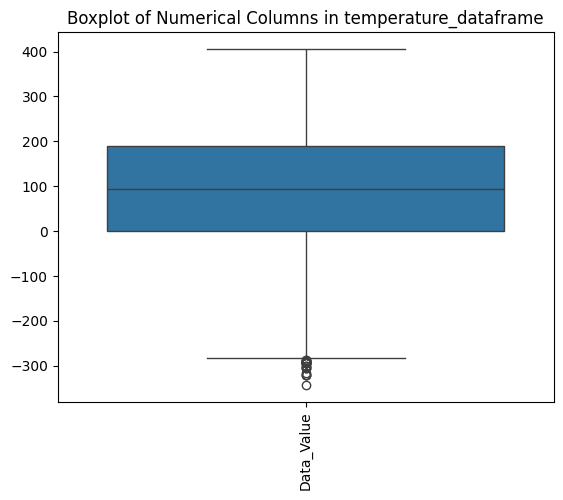

In [14]:
import seaborn as sns
plt.title("Boxplot of Numerical Columns in temperature_dataframe")
sns.boxplot(data=temperature_dataframe.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.show()

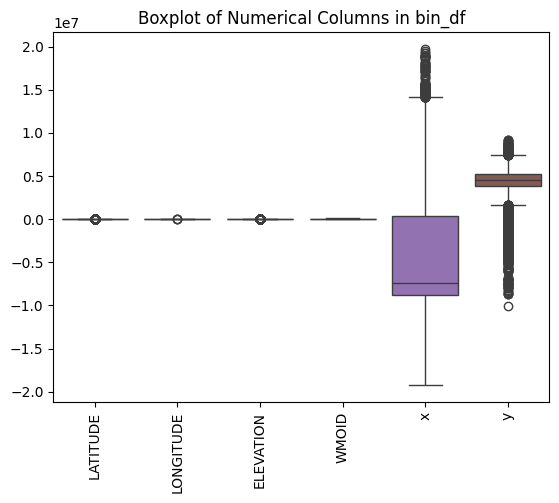

In [15]:
sns.boxplot(data=bin_df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Columns in bin_df")
plt.show()

Convert Date to datetime, Data_Value to degrees C

In [16]:
temperature_dataframe['Date'] = pd.to_datetime(temperature_dataframe['Date'])
temperature_dataframe['Data_Value'] = temperature_dataframe['Data_Value'] / 10.0

Filter 2005-2014, remove leap days

In [17]:
df_05_14 = temperature_dataframe[(temperature_dataframe['Date'].dt.year >= 2005) & (temperature_dataframe['Date'].dt.year <= 2014)]
df_05_14 = df_05_14[~((df_05_14['Date'].dt.month == 2) & (df_05_14['Date'].dt.day == 29))]

Group by day of year

In [18]:
df_05_14['DayOfYear'] = df_05_14['Date'].dt.strftime('%m-%d')
max_temp = df_05_14[df_05_14['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_temp = df_05_14[df_05_14['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

Create date index for plotting 

In [19]:
dates = pd.date_range('2012-01-01', '2012-12-31', freq='D').strftime('%m-%d')
max_temp = max_temp.reindex(dates)
min_temp = min_temp.reindex(dates)
plot_dates = pd.date_range('2012-01-01', '2012-12-31')

Plot 1: Record highs/lows 2005-2014Line graph of record high and record low temperatures by day (2005-2014)

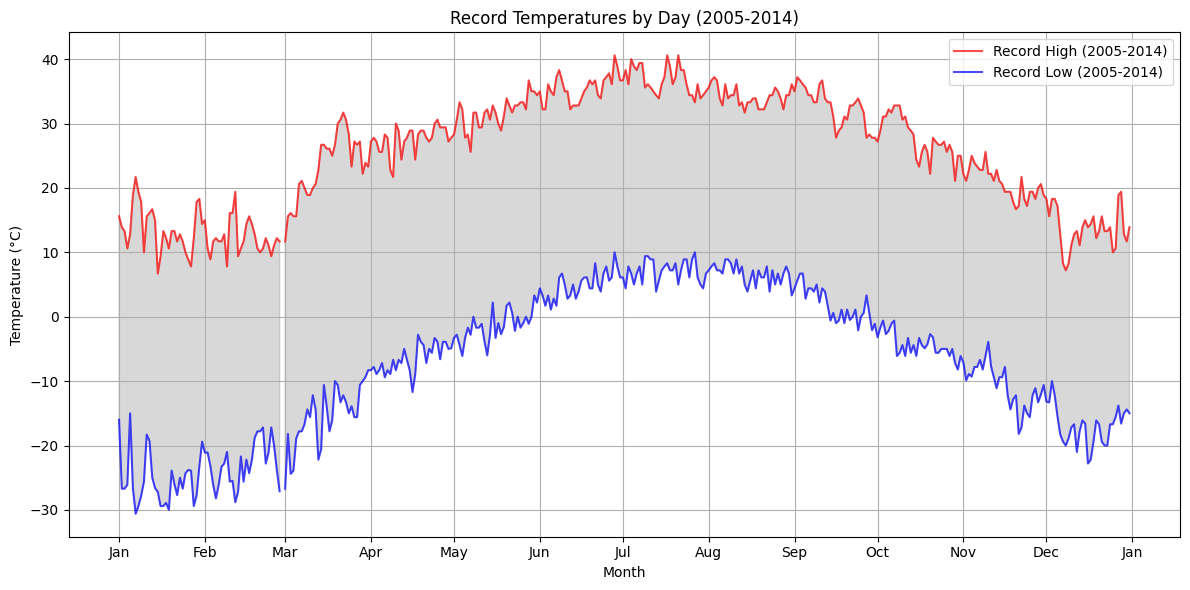

In [20]:
plt.figure(figsize=(12,6))
plt.plot(plot_dates, max_temp.values, label='Record High (2005-2014)', color='red', alpha=0.7)
plt.plot(plot_dates, min_temp.values, label='Record Low (2005-2014)', color='blue', alpha=0.7)
plt.fill_between(plot_dates, max_temp.values, min_temp.values, color='gray', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Record Temperatures by Day (2005-2014)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Overlay scatter of 2015 data where records were broken

In [28]:
# 2005-2014 data
df_05_14 = temperature_dataframe[(temperature_dataframe['Date'].dt.year >= 2005) & (temperature_dataframe['Date'].dt.year <= 2014)]
df_05_14 = df_05_14[~((df_05_14['Date'].dt.month == 2) & (df_05_14['Date'].dt.day == 29))]
df_05_14['DayOfYear'] = df_05_14['Date'].dt.strftime('%m-%d')
max_temp = df_05_14[df_05_14['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_temp = df_05_14[df_05_14['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

# 2015 data
df_2015 = temperature_dataframe[temperature_dataframe['Date'].dt.year == 2015]
df_2015['DayOfYear'] = df_2015['Date'].dt.strftime('%m-%d')
max_2015 = df_2015[df_2015['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_2015 = df_2015[df_2015['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16052\3235448641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['DayOfYear'] = df_2015['Date'].dt.strftime('%m-%d')


In [29]:
# Align dates
dates = pd.date_range('2012-01-01', '2012-12-31', freq='D').strftime('%m-%d')
max_temp = max_temp.reindex(dates)
min_temp = min_temp.reindex(dates)
max_2015 = max_2015.reindex(dates)
min_2015 = min_2015.reindex(dates)
plot_dates = pd.date_range('2012-01-01', '2012-12-31')

# Broken records
broken_high = max_2015 > max_temp
broken_low = min_2015 < min_temp

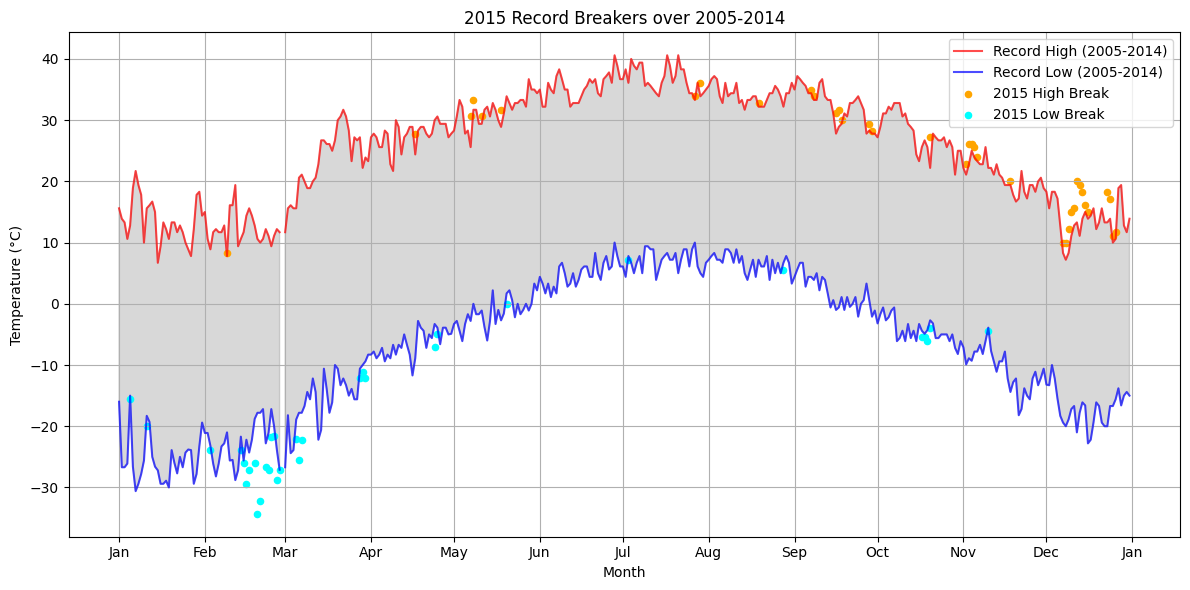

In [30]:
plt.figure(figsize=(12,6))
plt.plot(plot_dates, max_temp.values, label='Record High (2005-2014)', color='red', alpha=0.7)
plt.plot(plot_dates, min_temp.values, label='Record Low (2005-2014)', color='blue', alpha=0.7)
plt.fill_between(plot_dates, max_temp.values, min_temp.values, color='gray', alpha=0.3)
plt.scatter(plot_dates[broken_high], max_2015[broken_high], color='orange', label='2015 High Break', s=20)
plt.scatter(plot_dates[broken_low], min_2015[broken_low], color='cyan', label='2015 Low Break', s=20)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('2015 Record Breakers over 2005-2014')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualize stations near Ann Arbor, Michigan

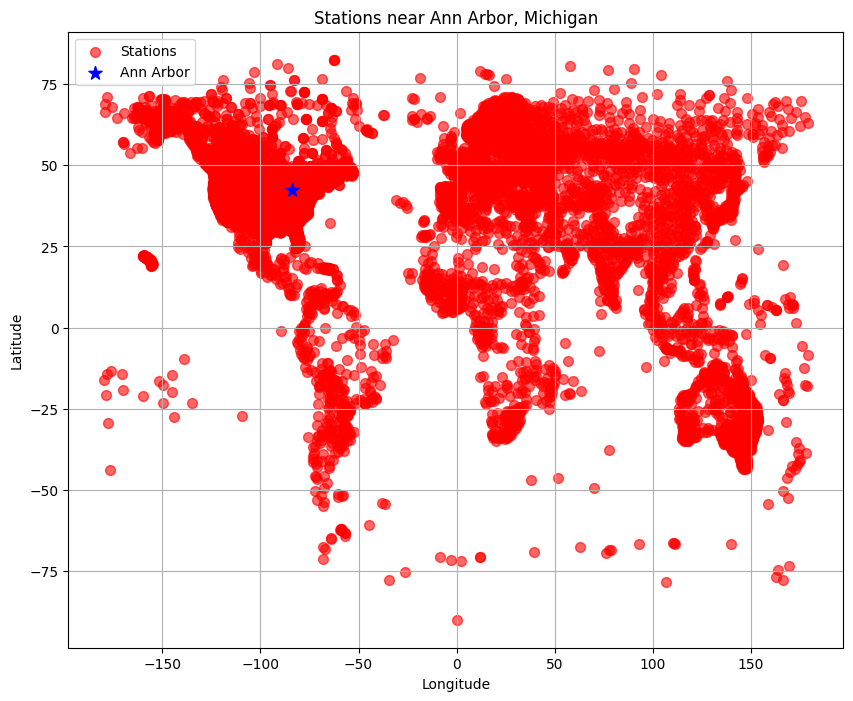

In [36]:
# Define Ann Arbor coordinates
ann_arbor_lat, ann_arbor_lon = 42.28, -83.74

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(bin_df['LONGITUDE'], bin_df['LATITUDE'], c='red', s=50, label='Stations', alpha=0.6)
plt.scatter(ann_arbor_lon, ann_arbor_lat, c='blue', s=100, label='Ann Arbor', marker='*')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Stations near Ann Arbor, Michigan')
plt.legend()
plt.grid(True)
plt.show()

Plot 2015 Temperature Summary near Ann Arbor

In [31]:
# 2015 data
df_2015 = temperature_dataframe[temperature_dataframe['Date'].dt.year == 2015]
df_2015['DayOfYear'] = df_2015['Date'].dt.strftime('%m-%d')
max_2015 = df_2015[df_2015['Element'] == 'TMAX'].groupby('DayOfYear')['Data_Value'].max()
min_2015 = df_2015[df_2015['Element'] == 'TMIN'].groupby('DayOfYear')['Data_Value'].min()

# Align dates
dates = pd.date_range('2015-01-01', '2015-12-31', freq='D').strftime('%m-%d')
max_2015 = max_2015.reindex(dates)
min_2015 = min_2015.reindex(dates)
plot_dates = pd.date_range('2015-01-01', '2015-12-31')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16052\2272659337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['DayOfYear'] = df_2015['Date'].dt.strftime('%m-%d')


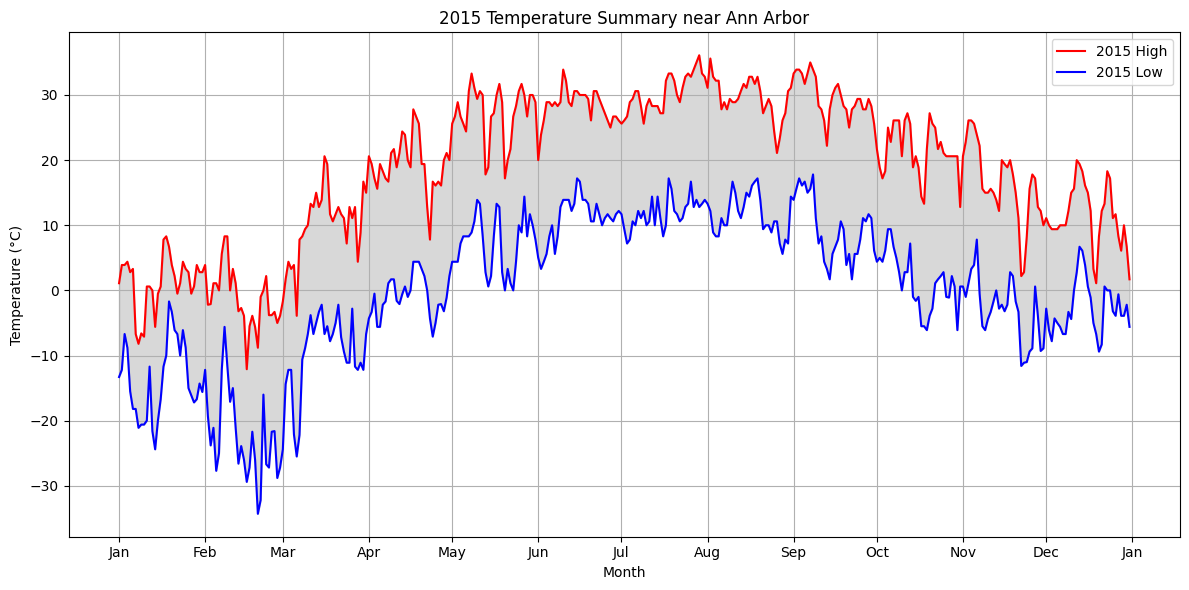

In [32]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(plot_dates, max_2015.values, label='2015 High', color='red')
plt.plot(plot_dates, min_2015.values, label='2015 Low', color='blue')
plt.fill_between(plot_dates, max_2015.values, min_2015.values, color='gray', alpha=0.3)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('2015 Temperature Summary near Ann Arbor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()